Implement kNN Algorithm: Use a kNN algorithm implementation in Python, such as scikit-learn's KNeighborsClassifier

In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [1]:
df=pd.read_excel(r'C:\Users\hp\Desktop\M2\PFE\Code\code pfe\Coud source\Code\data\Well-15_04-10-2021.xlsx')
df.shape

NameError: name 'pd' is not defined

In [6]:
df.columns

Index(['index', 'CHKP (kPa)', 'SPM1 (1/s)', 'SKNO', 'SPM2 (1/s)', 'SPM3 (1/s)',
       'SQID', 'TVA (m3)', 'DATE', 'TIME', 'MFOP ((m3/s)/(m3/s))', 'ACTC',
       'MFOA (m3/s)', 'DBTM (m)', 'DBTV (m)', 'MFIA (m3/s)', 'DMEA (m)',
       'MDIA (kg/m3)', 'DVER (m)', 'MTOA (degC)', 'BPOS (m)', 'MTIA (degC)',
       'ROPA (m/h)', 'MCOA (S/m)', 'HKLA (N)', 'MCIA (S/m)', 'HKLX (N)',
       'STKC', 'WOBA (N)', 'WOBX (N)', 'DRTM (m)', 'TQA (N.m)', 'TQX (N.m)',
       'GASA (mol/mol)', 'RPMA (rad/s)', 'SPPA (kPa)', 'RIG_STATE',
       'MDOA (kg/m3)', 'ROPI (m/s)', 'Unnamed: 39', 'STATUS', 'Unnamed: 41'],
      dtype='object')

 X represent the featurs and y represent the class

In [6]:
X=df[['TVA (m3)', 'SPPA (kPa)', 'MFOP ((m3/s)/(m3/s))',
       'GASA (mol/mol)']]
y=df ['STATUS']


In [ ]:
len(df[df['STATUS']==1])

Split the Data: Split the data into training and testing sets:

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
print(sum(y_test))
print(sum(y_train))

Scale Features: If required, scale the features using a standard scaler:

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


Train the Model: Create an instance of the kNN classifier and fit it to the training data

In [ ]:
k = 15# Number of nearest neighbors to consider
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)


Make Predictions: Use the trained model to make predictions on the testing data:

In [ ]:
y_pred = knn.predict(X_test)


Evaluate the Model: Assess the performance of the model using evaluation metrics such as accuracy, precision, recall, or F1 score:

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print('accuracy: {} , precision: {}, recall: {} , f1_score: {}'.format(accuracy,precision,recall,f1))
cm=confusion_matrix(y_test,y_pred)
print(cm)

In [170]:
acc,prec,rec,fs,kv=[],[],[],[],[]
for i in range(3,30):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    kv.append(i)
    acc.append(accuracy)
    prec.append(precision)
    rec.append(recall)
    fs.append(f1)

In [ ]:
l={'accuracy':acc,'precision':prec,'recall':rec,'f1_score':fs,'value of k':kv}
l=pd.DataFrame(l)
l

In [ ]:
x1=l[['accuracy', 'precision', 'recall', 'f1_score' ]]

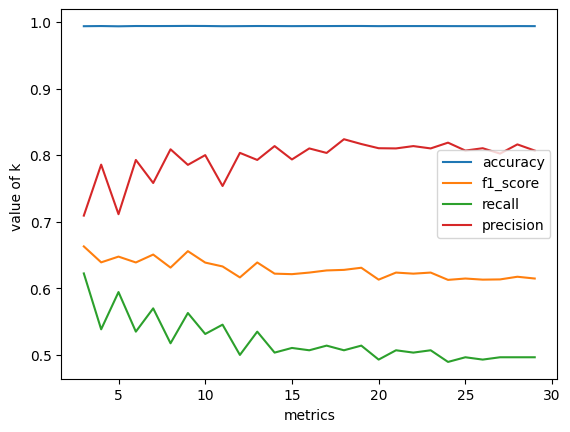

In [135]:
plt.plot(kv,acc,label='accuracy')
plt.plot(kv,fs,label='f1_score')
plt.plot(kv,rec,label='recall')
plt.plot(kv,prec,label='precision')
plt.xlabel('metrics')
plt.ylabel('value of k ')
plt.legend()

# Show the plot
plt.show()

In [ ]:
len(fs)

In [136]:

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a kNN classifier
knn = KNeighborsClassifier(n_neighbors=5)

# Perform cross-validation on the training set
scores = cross_val_score(knn, X_train, y_train, cv=5)

# Print the cross-validation scores
print("Cross-Validation Scores:", scores)

# Fit the model on the entire training set
knn.fit(X_train, y_train)

# Evaluate the model on the test set
accuracy = knn.score(X_test, y_test)
print("Test Accuracy:", accuracy)


Cross-Validation Scores: [0.99284712 0.99324821 0.99278027 0.99344876 0.99298034]
Test Accuracy: 0.9942777688646451


In [2]:
df=pd.read_excel(r'C:\Users\hp\Desktop\M2\PFE\Code\code pfe\Coud source\Code\dataset\all.xlsx')
df.shape

(93493, 19)

In [172]:
df.columns

Index(['Unnamed: 0', 'index', 'TVA (m3)', 'SPPA (kPa)', 'MFOA (m3/s)',
       'MFOP ((m3/s)/(m3/s))', 'GASA (mol/mol)', 'STATUS', 'Unnamed: 40', 'id',
       'Unnamed: 39', 'Unnamed: 43', 'Unnamed: 45', 'Unnamed: 41',
       'variation_TVA (m3)', 'variation_SPPA (kPa)',
       'variation_MFOP ((m3/s)/(m3/s))', 'variation_MFOA (m3/s)',
       'variation_GASA (mol/mol)'],
      dtype='object')

In [12]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Step 1: Preprocessing and feature extraction

# Assuming you have a DataFrame 'df' containing your dataset, where:
# - The column 'id' contains the time
# - Columns 'mfop', 'sppa', 'TVA', 'gasa' contain the features
# - The column 'Status' contains the class labels (0 or 1)
# Modify the code accordingly if your data is in a different format.

# Extract features and class labels
X = df[['TVA (m3)', 'SPPA (kPa)',
       'MFOP ((m3/s)/(m3/s))', 'GASA (mol/mol)']].values
y = df['STATUS'].values

# Step 2: Normalizing the features
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

# Step 3: Preparing time windows for prediction
window_size = 36  # 3 minutes (3 minutes * 60 seconds / 5 seconds per data point)

X_windows = []
y_windows = []
window_ids = []
for i in range(len(X_normalized) - window_size):
    X_windows.append(X_normalized[i:i+window_size])
    y_windows.append(y[i+window_size])
    window_ids.append(i)
X_windows = np.array(X_windows)
y_windows = np.array(y_windows)


# Reshape the windowed data to a two-dimensional format
X_windows_2d = X_windows.reshape(X_windows.shape[0], -1)


In [13]:
# Step 4: Add time or sequence identifier column
X_windows_with_id = pd.DataFrame(X_windows_2d)
X_windows_with_id['window_id'] = window_ids

# Step 5: Time series feature extraction with tsfresh

In [14]:
from tsfresh import extract_features
X_features = extract_features(X_windows_with_id, column_id='window_id')


Feature Extraction:   0%|          | 0/10 [00:00<?, ?it/s]

(93457,)

In [ ]:
# Step 4: Time series cross-validation
tscv = TimeSeriesSplit(n_splits=93454)  # Define the number of splits

accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

for train_index, test_index in tscv.split(X_windows):
    X_train, X_test = X_windows_2d[train_index], X_windows_2d[test_index]
    y_train, y_test = y_windows[train_index], y_windows[test_index]

    # Step 5: Training
    k = 3  # Number of neighbors to consider
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    # Step 6: Classification
    y_pred = knn.predict(X_test)

    # Step 7: Evaluation
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)

# Step 8: Average performance across all cross-validation folds
average_accuracy = np.mean(accuracy_scores)
average_precision = np.mean(precision_scores)
average_recall = np.mean(recall_scores)
average_f1 = np.mean(f1_scores)

print("Average Accuracy:", average_accuracy)
print("Average Precision:", average_precision)
print("Average Recall:", average_recall)
print("Average F1-Score:", average_f1)

# Step 9: Hyperparameter tuning
# You can experiment with different values of k and evaluate their impact on performance.


In [191]:
average_accuracy = np.min(accuracy_scores)
average_precision = np.min(precision_scores)
average_recall = np.min(recall_scores)
average_f1 = np.min(f1_scores)

print("Average Accuracy:", average_accuracy)
print("Average Precision:", average_precision)
print("Average Recall:", average_recall)
print("Average F1-Score:", average_f1)

Average Accuracy: 0.934557438794727
Average Precision: 0.0
Average Recall: 0.0
Average F1-Score: 0.0


In [94]:
df=pd.read_excel(r'C:\Users\hp\Desktop\M2\PFE\Code\code pfe\dataset\Well-6_01-07-2022.xlsx')
df.shape

(17280, 42)

In [95]:
df.columns

Index(['index', 'CHKP (kPa)', 'SPM1 (1/s)', 'SKNO', 'SPM2 (1/s)', 'SPM3 (1/s)',
       'SQID', 'TVA (m3)', 'DATE', 'TIME', 'MFOP ((m3/s)/(m3/s))', 'ACTC',
       'MFOA (m3/s)', 'DBTM (m)', 'DBTV (m)', 'MFIA (m3/s)', 'DMEA (m)',
       'MDIA (kg/m3)', 'DVER (m)', 'MTOA (degC)', 'BPOS (m)', 'MTIA (degC)',
       'ROPA (m/h)', 'MCOA (S/m)', 'HKLA (N)', 'MCIA (S/m)', 'HKLX (N)',
       'STKC', 'WOBA (N)', 'WOBX (N)', 'DRTM (m)', 'TQA (N.m)', 'TQX (N.m)',
       'GASA (mol/mol)', 'RPMA (rad/s)', 'SPPA (kPa)', 'RIG_STATE',
       'MDOA (kg/m3)', 'ROPI (m/s)', 'Unnamed: 39', 'STATUS', 'Unnamed: 41'],
      dtype='object')

In [103]:
cols=[ 'CHKP (kPa)', 'SPM1 (1/s)', 'SKNO', 'SPM2 (1/s)', 'SPM3 (1/s)',
       'SQID', 'TVA (m3)',  'MFOP ((m3/s)/(m3/s))', 'ACTC',
       'MFOA (m3/s)', 'DBTM (m)', 'DBTV (m)', 'MFIA (m3/s)', 'DMEA (m)',
       'MDIA (kg/m3)', 'DVER (m)', 'MTOA (degC)', 'BPOS (m)', 'MTIA (degC)',
       'ROPA (m/h)', 'MCOA (S/m)', 'HKLA (N)', 'MCIA (S/m)', 'HKLX (N)',
       'STKC', 'WOBA (N)', 'WOBX (N)', 'DRTM (m)', 'TQA (N.m)', 'TQX (N.m)',
       'GASA (mol/mol)', 'RPMA (rad/s)', 'SPPA (kPa)', 'RIG_STATE']

In [47]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score, KFold
from sklearn.preprocessing import StandardScaler



# Select the features and target variable


# Preprocess the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Transform the time series into a supervised learning problem
def create_lagged_features(X, y, n_lags, steps_ahead):
    X_lagged, y_lagged = [], []
    for i in range(n_lags, len(X) - steps_ahead):
        X_lagged.append(X[i - n_lags:i])
        y_lagged.append(y[i + steps_ahead])
    return np.array(X_lagged), np.array(y_lagged)

n_lags = 36
steps_ahead = 1
X_lagged, y_lagged = create_lagged_features(X_scaled, y, n_lags, steps_ahead)

# Train the kNN model using 10-fold cross-validation


In [48]:
y_lagged.shape

(6361,)

In [49]:
X_lagged_2d = X_lagged.reshape(X_lagged.shape[0], -1)
y_lagged_2d=y_lagged.reshape(y_lagged.shape[0], -1)

In [50]:
X_lagged_2d.shape

(6361, 144)

In [15]:
k = 5
knn = KNeighborsRegressor(n_neighbors=k)



Mean Absolute Error (10-fold cross-validation): 0.0036916509891357025
Mean Squared Error (10-fold cross-validation): 0.0021216815014981393


In [68]:
window_size =3  # Number of time steps to consider (5 seconds * 36 = 3 minutes)
target_horizon =1# Number of time steps ahead to predict (5 seconds * 6 = 30 seconds)
L=[1,2,3,4,5,6,7,8,9,10,11,12,13,14]
Ly=[1,2,3,4,5,6,7,8,9,10,11,12,13,14]
# Generate input sequences and corresponding targets
X_sequences = []
y_targets = []
for i in range(len(L) - window_size - target_horizon + 1):
    X_sequences.append(L[i:i+window_size])
    y_targets.append(Ly[i:window_size+target_horizon-1])

In [69]:
print(X_sequences)
print(y_targets)

[[1, 2, 3], [2, 3, 4], [3, 4, 5], [4, 5, 6], [5, 6, 7], [6, 7, 8], [7, 8, 9], [8, 9, 10], [9, 10, 11], [10, 11, 12], [11, 12, 13]]
[[1, 2, 3], [2, 3], [3], [], [], [], [], [], [], [], []]


In [53]:
from sklearn.model_selection import train_test_split
train_features , test_features , train_labels , test_labels = train_test_split(X, y, test_size= 0.38, shuffle=False)
T = 45 # my choice of the rolling window
prepend_features = train_features.iloc[-(T- 1 ):]
test_features = pd.concat([prepend_features , test_features ], axis=0)
X_train , y_train = [], []
for i in range(train_labels.shape[ 0 ] - (T- 1 )):
    X_train.append(train_features.iloc[i:i+T].values)
    y_train.append(train_labels.iloc[i + (T- 1 )])
X_train , y_train = np.array(X_train), np.array(y_train).reshape(- 1 ,1 )
print(f'Train_data_dimensions:{X_train.shape},{y_train.shape}')
X_test , y_test = [], []
for i in range(test_labels.shape[ 0 ]):
    X_test.append(test_features.iloc[i:i+T].values)
    y_test.append(test_labels.iloc[i])
X_test , y_test = np.array(X_test), np.array(y_test).reshape(- 1 , 1 )
print(f'Test_data_dimensions:{X_test.shape},{y_test.shape}')



Train_data_dimensions:(3922, 45, 4),(3922, 1)
Test_data_dimensions:(2432, 45, 4),(2432, 1)


In [58]:
unique_elements, counts = np.unique(y_train, return_counts=True)
    # Print the frequencies
for element, count in zip(unique_elements, counts):
        print(f"y_test: {element}: {count}")



y_test: 0: 3836
y_test: 1: 86


In [71]:
df.columns

Index(['index', 'TVA (m3)', 'SPPA (kPa)', 'MFOP ((m3/s)/(m3/s))',
       'GASA (mol/mol)', 'STATUS', 'variation_TVA (m3)',
       'variation_SPPA (kPa)', 'variation_MFOP ((m3/s)/(m3/s))',
       'variation_GASA (mol/mol)'],
      dtype='object')

In [75]:
lag_size = 3

# Create lag features for each feature variable
for feature in ['TVA (m3)', 'SPPA (kPa)', 'MFOP ((m3/s)/(m3/s))',
       'GASA (mol/mol)']:
    for lag in range(1, lag_size + 1):
        # Create a new lag feature column by shifting the values
        df[f'{feature}_lag_{lag}'] = df[feature].shift(lag)

# Drop rows with NaN values introduced by the shifting
df.dropna(inplace=True)

# The DataFrame now contains the original features along with lag features


,index,TVA (m3),SPPA (kPa),MFOP ((m3/s)/(m3/s)),GASA (mol/mol),STATUS,variation_TVA (m3),variation_SPPA (kPa),variation_MFOP ((m3/s)/(m3/s)),variation_GASA (mol/mol),...,TVA (m3)_lag_3,SPPA (kPa)_lag_1,SPPA (kPa)_lag_2,SPPA (kPa)_lag_3,MFOP ((m3/s)/(m3/s))_lag_1,MFOP ((m3/s)/(m3/s))_lag_2,MFOP ((m3/s)/(m3/s))_lag_3,GASA (mol/mol)_lag_1,GASA (mol/mol)_lag_2,GASA (mol/mol)_lag_3
3,"05/30/2022, 00:00:54",73.864250,3212.3943,0.127418,0.000606,0,0.030525,-0.8507,-0.000129,0.000004,...,73.948906,3213.2450,3213.7318,3214.2181,0.127548,0.127971,0.128834,0.000602,0.000602,0.000616
4,"05/30/2022, 00:01:08",73.909523,3211.9083,0.129567,0.000606,0,0.045273,-0.4860,0.002149,0.000000,...,73.905380,3212.3943,3213.2450,3213.7318,0.127418,0.127548,0.127971,0.000606,0.000602,0.000602
5,"05/30/2022, 00:01:21",73.942894,3212.0296,0.131250,0.000616,0,0.033371,0.1213,0.001683,0.000010,...,73.833725,3211.9083,3212.3943,3213.2450,0.129567,0.127418,0.127548,0.000606,0.000606,0.000602
6,"05/30/2022, 00:01:35",73.953064,3208.6258,0.129688,0.000602,0,0.010170,-3.4038,-0.001562,-0.000014,...,73.864250,3212.0296,3211.9083,3212.3943,0.131250,0.129567,0.127418,0.000616,0.000606,0.000606
7,"05/30/2022, 00:01:48",73.965912,3209.3552,0.130111,0.000606,0,0.012848,0.7294,0.000423,0.000004,...,73.909523,3208.6258,3212.0296,3211.9083,0.129688,0.131250,0.129567,0.000602,0.000616,0.000606


In [78]:
data_roled=pd.read_csv(r'C:\Users\hp\Desktop\M2\PFE\Code\code pfe\Test\data Rolled .csv')

In [81]:
data_roled.columns

Index(['id', 'index', 'TVA (m3)', 'SPPA (kPa)', 'MFOA (m3/s)',
       'MFOP ((m3/s)/(m3/s))', 'GASA (mol/mol)', 'STATUS'],
      dtype='object')

In [84]:
df_features=data_roled[['TVA (m3)', 'SPPA (kPa)', 'MFOA (m3/s)',
       'MFOP ((m3/s)/(m3/s))', 'GASA (mol/mol)']]
y=data_roled['STATUS']


In [85]:
from tsfresh import select_features
df_selected = select_features(df_features , y, fdr_level = 0.05)

In [89]:
data_roled.columns

Index(['id', 'index', 'TVA (m3)', 'SPPA (kPa)', 'MFOA (m3/s)',
       'MFOP ((m3/s)/(m3/s))', 'GASA (mol/mol)', 'STATUS'],
      dtype='object')

<Axes: >

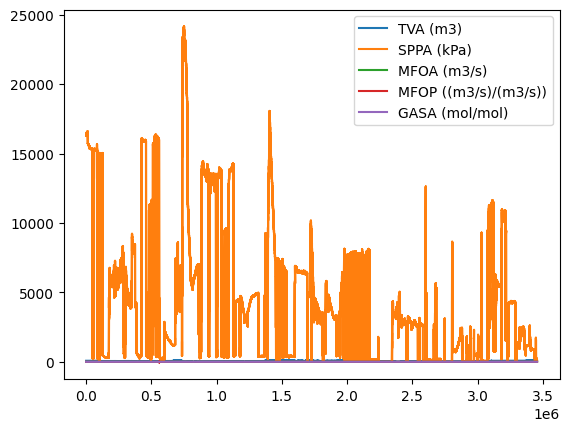

In [90]:
df_selected.plot()

In [111]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score

# Load the data

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df[cols], df['STATUS'], test_size=0.2)

# Create a DecisionTreeClassifier model
model = DecisionTreeClassifier()

# Fit the model to the training data
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

    # Compute evaluation metrics
cm = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print('Confusion Matrix:\n', cm)
print('Precision:', precision)
print('Recall:', recall)
print('F1-Score:', f1)
print('Accuracy:',accuracy)
print('-----------------------')
# Get the feature importances from the model
feature_importances = model.feature_importances_
k=0
for i in cols:
    if feature_importances[k]>0:
        print(i,feature_importances[k])
    k+=1

# Sort the feature importances in descending order
sorted_feature_importances = sorted(feature_importances, reverse=True)

# Print the top 5 feature importances
print(sorted_feature_importances[:5])

Confusion Matrix:
 [[3432    1]
 [   1   22]]
Precision: 0.9565217391304348
Recall: 0.9565217391304348
F1-Score: 0.9565217391304348
Accuracy: 0.9994212962962963
-----------------------
SQID 0.26843665349297
MFOP ((m3/s)/(m3/s)) 0.013900674649584976
DMEA (m) 0.011440682269854124
STKC 0.24886697611727604
GASA (mol/mol) 0.44986450054528987
SPPA (kPa) 0.007490512925024873
[0.44986450054528987, 0.26843665349297, 0.24886697611727604, 0.013900674649584976, 0.011440682269854124]


In [130]:
import pandas as pd
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Load the data
X = df[['TVA (m3)', 'SPPA (kPa)', 'MFOP ((m3/s)/(m3/s))', 'GASA (mol/mol)']]
y = df['STATUS']
# Create the feature selector
selector = SelectKBest(score_func=chi2, k=2)

# Fit the selector to the data
selector.fit(X,y)

# Get the selected features
selected_features = selector.get_support()

# Print the selected features
selected_features

array([ True,  True, False, False])

In [131]:
from sklearn.ensemble import RandomForestClassifier

# Create the model
model = RandomForestClassifier()

# Fit the model to the data
model.fit(X, y)

# Make a prediction
prediction = model.predict(X)

In [138]:
accuracy = accuracy_score(df['STATUS'], prediction)
precision=precision_score(df['STATUS'], prediction)

# Print the accuracy
print(accuracy,precision)

0.9998842592592593 0.9819819819819819


In [136]:

unique_elements, counts = np.unique(prediction, return_counts=True)

    # Print the frequencies
for element, count in zip(unique_elements, counts):
        print(f"y_test: {element}: {count}")

y_test: 0: 17169
y_test: 1: 111
